# House Price Prediction using Linear Regression

### Importing data handling modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading house pricing dataset

In [2]:
housedata = pd.read_csv("dataset/houseprice.csv")

### View dataset

In [3]:
housedata

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


### Glance at data

In [4]:
housedata.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


### Description and information about our dataset

In [5]:
print("Description:")
print(housedata.describe())
print("\nInformation: \n")
print(housedata.info())

Description:
              price          area    bedrooms   bathrooms
count  5.450000e+02    545.000000  545.000000  545.000000
mean   4.766729e+06   5150.541284    2.965138    1.286239
std    1.870440e+06   2170.141023    0.738064    0.502470
min    1.750000e+06   1650.000000    1.000000    1.000000
25%    3.430000e+06   3600.000000    2.000000    1.000000
50%    4.340000e+06   4600.000000    3.000000    1.000000
75%    5.740000e+06   6360.000000    3.000000    2.000000
max    1.330000e+07  16200.000000    6.000000    4.000000

Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None


### Plotting data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>]], dtype=object)

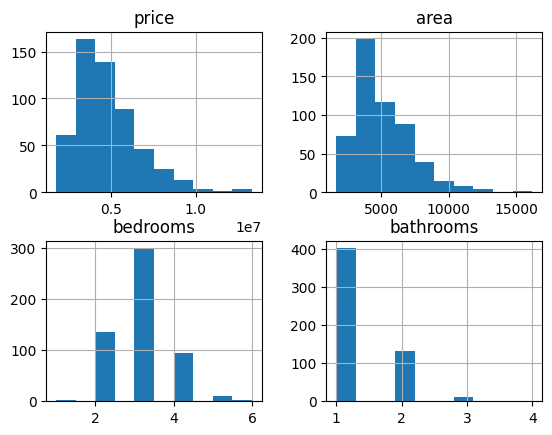

In [6]:
housedata.hist()

### Using scatter plot

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='bedrooms', ylabel='area'>,
        <Axes: xlabel='bathrooms', ylabel='area'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='area', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bedrooms'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='area', ylabel='bathrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>]], dtype=object)

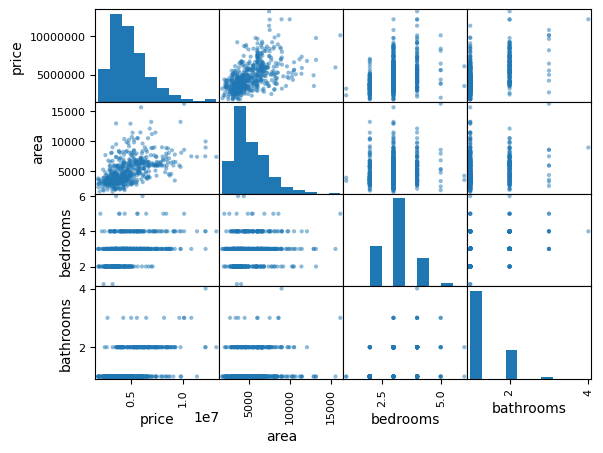

In [7]:
# get scatter matrix - multi-dimensional data
from pandas.plotting import scatter_matrix

# plot the housedata
scatter_matrix(housedata)

### Spliting data into features and labels

#### features are: area, bedrooms, bathrooms
#### label is: price

In [8]:
# Main data
housedata

# Size of house
print("Size of house data: \n", len(housedata), "\n")

# Separate features
features = housedata.drop("price", axis = 1)

# Separate labels
labels = housedata["price"]

# Look at features
print("House Features:\n", features)

# Look at labels
print("House Labels:\n", labels)

Size of house data: 
 545 

House Features:
      area  bedrooms  bathrooms
0    7420         4          2
1    8960         4          4
2    9960         3          2
3    7500         4          2
4    7420         4          1
..    ...       ...        ...
540  3000         2          1
541  2400         3          1
542  3620         2          1
543  2910         3          1
544  3850         3          1

[545 rows x 3 columns]
House Labels:
 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


### Spliting Train-Test data

In [9]:
# using train-test-spliting function of sklearn
# import the train_test_split
from sklearn.model_selection import train_test_split

# For convenience, Features are X axis data
# Labels are Y axis data
X = features
Y = labels

# x_train data and x_test data for features
# y_train data and y_test data for labels
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.85, test_size = 0.15, random_state = 0)

# Size of features
print("Size of train features: ", len(x_train))
print("Size of test features: ", len(x_test))

print()

# Size of features
print("Size of train labels: ", len(y_train))
print("Size of test labels: ", len(y_test))

print()
# Glance at Train and Test features
print("Train Features:\n", x_train)
print("Test Features:\n", x_test)

print()

# Glance at Train and Test labels
print("Train Labels:\n", y_train)
print("Test Labels:\n", y_test)

Size of train features:  463
Size of test features:  82

Size of train labels:  463
Size of test labels:  82

Train Features:
       area  bedrooms  bathrooms
238   4510         4          2
342   7152         3          1
389   4600         4          1
108   3240         4          1
350   3420         2          1
..     ...       ...        ...
70    4000         3          2
277  10360         2          1
9     5750         3          2
359   3600         3          1
192   6600         3          1

[463 rows x 3 columns]
Test Features:
       area  bedrooms  bathrooms
239   4000         3          1
113   9620         3          1
325   3460         4          1
66   13200         2          1
479   3660         4          1
..     ...       ...        ...
89    8580         5          3
543   2910         3          1
381   4000         2          1
436   2145         3          1
196   7686         3          1

[82 rows x 3 columns]

Train Labels:
 238    4613000
342    3850

### Model Selection

#### We will use Linear Regression model to predict house price

In [10]:
from sklearn.linear_model import LinearRegression

### Create a linear regression model

In [11]:
model = LinearRegression()

### Fitting data into the model

In [12]:
model.fit(x_train, y_train)

LinearRegression()

### Predict labels using test features

In [13]:
pred_y_labels = model.predict(x_test)

In [14]:
# Glance at predicted values
print(pred_y_labels[:5])

[3937563.35342532 6114879.42741327 4193982.4640431  7036225.59525161
 4271467.02183627]


### Model Evaluation : Accuracy

#### we will  use mean absolute percentage error to find the accuracy

In [15]:
# will use mean_absolute_percentage_error() fromm sklearn
from sklearn.metrics import mean_absolute_percentage_error

# find error 
err = mean_absolute_percentage_error(y_test, pred_y_labels)

print(type(x_test))

print("Percentage of absolute error is ", err)

<class 'pandas.core.frame.DataFrame'>
Percentage of absolute error is  0.1933982917005743


### Saving the model

#### We will use joblib to save our model object to a file

In [16]:
# to save the model for later use
import joblib

# save the file to local device
modelfile = "model/hpricepredictor.sav"
joblib.dump(model, modelfile)

['model/hpricepredictor.sav']

### Loading the model from local file

#### Same can be done using joblib

In [17]:
# load model from the file
loaded_model = joblib.load("model/hpricepredictor.sav")

## Test on a data

In [20]:
# test data
area =  500
bedrooms = 1
bathrooms = 0

# making a list of data
data = { "area" : [area], "bedrooms" : [bedrooms], "bathrooms" : [bathrooms] }

# making data frame for model
test_data = pd.DataFrame(data)

# glance our test data
print(test_data)

# predict the price of house using above features
result = loaded_model.predict(test_data)

# price
print("\nPrice of the house: ", round(result[0]))

   area  bedrooms  bathrooms
0   500         1          0

Price of the house:  228510
